![Credit card being held in hand](credit_card.jpg)

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this workbook, you will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

### The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

### 🎯Target Accuracy Score at least `0.75`

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None) 
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


In [3]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    int64  
 13  13      690 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 75.6+ KB


In [4]:
cc_apps.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

### `1` Column unknown value handling

In [5]:
cc_apps[1] = cc_apps[1].replace('?',np.nan)

In [6]:
cc_apps[1].isna().sum()

12

<Axes: >

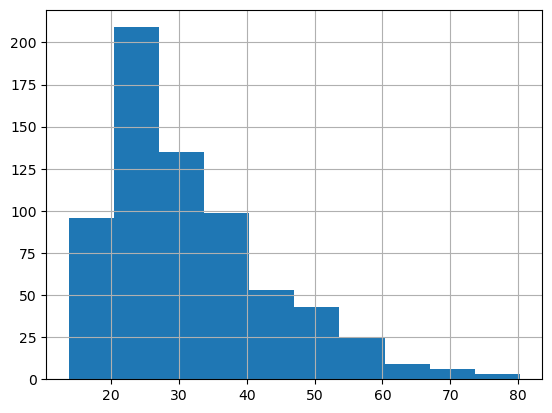

In [7]:
cc_apps[1] = cc_apps[1].astype(float)
cc_apps[1].hist()

In [8]:
#Filling unknown value with median

In [9]:
median_value_c1 = cc_apps[1].median()

In [10]:
cc_apps[1] = cc_apps[1].fillna(median_value_c1)

In [11]:
cc_apps[1].isna().sum()

0

In [12]:
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


In [13]:
for i in cc_apps.columns:
    if cc_apps[i].dtypes == 'object':
        cc_apps[i] = cc_apps[i].replace('?','unknown')

In [14]:
for i in cc_apps.columns:
    if cc_apps[i].dtypes == 'object':
        if cc_apps[i].astype(str).str.contains(r'\?', regex=True).any():
            print(cc_apps[i].name)
        

### Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import is_numeric_dtype

mappings = {}

for column in cc_apps.columns:
    if not is_numeric_dtype(cc_apps[column]):
        label_encoder = LabelEncoder()
        cc_apps[column] = label_encoder.fit_transform(cc_apps[column])
        mappings[column] = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

In [16]:
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,30.83,0.000,1,0,13,8,1.25,1,1,1,0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,824,0
3,1,27.83,1.540,1,0,13,8,3.75,1,1,5,0,3,0
4,1,20.17,5.625,1,0,13,8,1.71,1,0,0,2,0,0


In [17]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    int32  
 1   1       690 non-null    float64
 2   2       690 non-null    float64
 3   3       690 non-null    int32  
 4   4       690 non-null    int32  
 5   5       690 non-null    int32  
 6   6       690 non-null    int32  
 7   7       690 non-null    float64
 8   8       690 non-null    int32  
 9   9       690 non-null    int32  
 10  10      690 non-null    int64  
 11  11      690 non-null    int32  
 12  12      690 non-null    int64  
 13  13      690 non-null    int32  
dtypes: float64(3), int32(9), int64(2)
memory usage: 51.3 KB


In [18]:
X = cc_apps.drop(labels=[13], axis=1)
y = cc_apps[13]

In [19]:
X.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,30.83,0.00,1,0,13,8,1.25,1,1,1,0,0
1,0,58.67,4.46,1,0,10,3,3.04,1,1,6,0,560
2,0,24.50,0.50,1,0,10,3,1.50,1,0,0,0,824


In [20]:
X.shape, y.shape

((690, 13), (690,))

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#### Scaling Data

In [22]:
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(X)
X_scaled = pd.DataFrame(standard_scaled, columns=X.columns)

In [23]:
X_scaled.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.586487,-0.057723,-0.956613,-0.560612,-0.569742,1.544252,0.779109,-0.291083,0.95465,1.157144,-0.288101,-0.317171,-0.195413
1,-1.457332,2.291317,-0.060051,-0.560612,-0.569742,0.883387,-0.906112,0.244190,0.95465,1.157144,0.740830,-0.317171,-0.087852
2,-1.457332,-0.591826,-0.856102,-0.560612,-0.569742,0.883387,-0.906112,-0.216324,0.95465,-0.864196,-0.493887,-0.317171,-0.037144


#### Spliting Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=.2, random_state=346)

#### Model Training

In [25]:
logreg = LogisticRegression()

In [26]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = logreg.predict(X_test)

In [28]:
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)
print("Training Score: ", train_score)
print("Testing Score: ", test_score)

Training Score:  0.875
Testing Score:  0.8478260869565217


### Hyperparameter Tuning 

In [39]:
param_grid = {
    'penalty': ['l1'],      
    'solver': ['liblinear'], 
    'C': np.arange(0.05, 1.2, 0.1)  
}

In [40]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

In [41]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15]),
                         'penalty': ['l1'], 'solver': ['liblinear']},
             scoring='accuracy')

In [42]:
# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.35000000000000003, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8642096642096643


In [43]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_score = best_model.score(X_test, y_test)
print("Test Set Accuracy:", best_score)

Test Set Accuracy: 0.855072463768116
